# Machine Learning Experiments

## Linear Regression

### Import libraries

In [1]:
import numpy as np
import pandas as pd


from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn import tree as tr
from sklearn.ensemble import RandomForestRegressor
from sklearn import preprocessing as pp
from sklearn.pipeline import Pipeline
from sklearn import metrics as mt
from matplotlib import pyplot as plt

import warnings
warnings.filterwarnings('ignore')

### Load datasets

In [2]:
X_train = pd.read_csv('./X_training.csv')
X_test = pd.read_csv('./X_test.csv')
X_val = pd.read_csv('./X_validation.csv')
y_train = pd.read_csv('./y_training.csv')
y_test = pd.read_csv('./y_test.csv')
y_val = pd.read_csv('./y_validation.csv')

In [3]:
X_train.head(3)

,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,0.205673,0.0921,0.720,0.802,0.000000,0.090909,0.694,0.431778,1,0.0582,0.103876,0.8,0.723
1,-0.240409,0.7370,0.483,0.412,0.000000,0.636364,0.116,-0.262732,1,0.0402,1.711532,0.6,0.247
2,-0.125770,0.2740,0.671,0.565,0.000065,1.000000,0.370,0.013612,0,0.1600,1.009176,0.8,0.561


### Pre-processing

In [4]:
# Observing data information
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10547 entries, 0 to 10546
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   song_duration_ms  10547 non-null  float64
 1   acousticness      10547 non-null  float64
 2   danceability      10547 non-null  float64
 3   energy            10547 non-null  float64
 4   instrumentalness  10547 non-null  float64
 5   key               10547 non-null  float64
 6   liveness          10547 non-null  float64
 7   loudness          10547 non-null  float64
 8   audio_mode        10547 non-null  int64  
 9   speechiness       10547 non-null  float64
 10  tempo             10547 non-null  float64
 11  time_signature    10547 non-null  float64
 12  audio_valence     10547 non-null  float64
dtypes: float64(12), int64(1)
memory usage: 1.0 MB


### Training dataset

In [5]:
# Instantiate Linear Regression
lr = LinearRegression()

# Train the model with the training data
lr.fit(X_train, y_train)

# Make predictions on the training data
y_train_pred_lr = lr.predict(X_train)

# Calculate evaluation metrics and round to 3 decimal places
# R squared
train_r2_lr = round(mt.r2_score(y_train, y_train_pred_lr), 3)

# MSE
train_mse_lr = round(mt.mean_squared_error(y_train, y_train_pred_lr), 3)

# RMSE
train_rmse_lr = round(np.sqrt(train_mse_lr), 2)

# MAE
train_mae_lr = round(mt.mean_absolute_error(y_train, y_train_pred_lr), 2)

# MAPE
train_mape_lr = round(mt.mean_absolute_percentage_error(y_train, y_train_pred_lr), 2)

# Display the results
print(f"R²={train_r2_lr} "
      f"| MSE: {train_mse_lr}, RMSE: {train_rmse_lr}, "
      f"MAE: {train_mae_lr}, MAPE: {train_mape_lr}%")

R²=0.046 | MSE: 455.996, RMSE: 21.35, MAE: 17.0, MAPE: 8.65%


### Validation dataset

In [6]:
# Train the model with the training data
lr.fit(X_train, y_train)

# Make predictions on the validation data
y_val_pred_lr = lr.predict(X_val)

# Calculate evaluation metrics and round to 3 decimal places
# R squared
val_r2_lr = round(mt.r2_score(y_val, y_val_pred_lr), 3)

# MSE
val_mse_lr = round(mt.mean_squared_error(y_val, y_val_pred_lr), 3)

# RMSE
val_rmse_lr = round(np.sqrt(val_mse_lr), 2)

# MAE
val_mae_lr = round(mt.mean_absolute_error(y_val, y_val_pred_lr), 2)

# MAPE
val_mape_lr = round(mt.mean_absolute_percentage_error(y_val, y_val_pred_lr), 2)

# Display the results
print(f"R²={val_r2_lr} "
      f"| MSE: {val_mse_lr}, RMSE: {val_rmse_lr}, "
      f"MAE: {val_mae_lr}, MAPE: {val_mape_lr}%")

R²=0.04 | MSE: 458.447, RMSE: 21.41, MAE: 17.04, MAPE: 8.68%


### Test dataset

In [7]:
# Train the model with the training and validation data
X_train_val = pd.concat([X_train, X_val])
y_train_val = pd.concat([y_train, y_val])

lr.fit(X_train_val, y_train_val)

# Make predictions on the test data
y_test_pred_lr = lr.predict(X_test)

# Calculate evaluation metrics and round to 3 decimal places
# R squared
test_r2_lr = round(mt.r2_score(y_test, y_test_pred_lr), 3)

# MSE
test_mse_lr = round(mt.mean_squared_error(y_test, y_test_pred_lr), 3)

# RMSE
test_rmse_lr = round(np.sqrt(test_mse_lr), 2)

# MAE
test_mae_lr = round(mt.mean_absolute_error(y_test, y_test_pred_lr), 2)

# MAPE
test_mape_lr = round(mt.mean_absolute_percentage_error(y_test, y_test_pred_lr), 2)

# Display the results
print(f"R²={test_r2_lr} "
      f"| MSE: {test_mse_lr}, RMSE: {test_rmse_lr}, "
      f"MAE: {test_mae_lr}, MAPE: {test_mape_lr}%")


R²=0.051 | MSE: 461.988, RMSE: 21.49, MAE: 17.14, MAPE: 8.53%


## Lasso

### Training dataset

In [8]:
# Define the lists of values for alpha and max_iter
lasso_alpha_values = [0.0001, 0.001, 0.01, 0.1, 1, 10]
lasso_max_iter_values = [100, 500, 1000, 5000]

# Lists to store the results
results_lr_lasso = []

# Nested loop to test all combinations
for alpha in lasso_alpha_values:
    for max_iter in lasso_max_iter_values:
        
        # Instantiate the Lasso with the current values of alpha and max_iter
        lasso = Lasso(alpha=alpha, max_iter=max_iter)

        # Train the model with the training data
        lasso.fit(X_train, y_train)

        # Make predictions on the training data
        y_train_pred_lr_lasso = lasso.predict(X_train)

        # Calculate evaluation metrics and round to 3 decimal places
        # R squared
        train_r2_lr_lasso = round(mt.r2_score(y_train, y_train_pred_lr_lasso), 3)

        # MSE
        train_mse_lr_lasso = round(mt.mean_squared_error(y_train, y_train_pred_lr_lasso), 3)

        # RMSE
        train_rmse_lr_lasso = round(np.sqrt(train_mse_lr_lasso), 2)

        # MAE
        train_mae_lr_lasso = round(mt.mean_absolute_error(y_train, y_train_pred_lr_lasso), 2)

        # MAPE
        train_mape_lr_lasso = round(mt.mean_absolute_percentage_error(y_train, y_train_pred_lr_lasso), 2)
        
        # Store the results in a list
        results_lr_lasso.append({
            'Alpha': alpha,
            'Max iter': max_iter,
            'R²': train_r2_lr_lasso,
            'MSE': train_mse_lr_lasso,
            'RMSE': train_rmse_lr_lasso,
            'MAE': train_mae_lr_lasso,
            'MAPE': train_mape_lr_lasso
        })

# Display the results
for result in results_lr_lasso:
    print(f"Alpha={result['Alpha']}, max_iter={result['Max iter']} "
          f"| R²: {result['R²']}, MSE: {result['MSE']}, "
          f"RMSE: {result['RMSE']}, MAE: {result['MAE']}, MAPE: {result['MAPE']}")

Alpha=0.0001, max_iter=100 | R²: 0.046, MSE: 455.996, RMSE: 21.35, MAE: 17.0, MAPE: 8.65
Alpha=0.0001, max_iter=500 | R²: 0.046, MSE: 455.996, RMSE: 21.35, MAE: 17.0, MAPE: 8.65
Alpha=0.0001, max_iter=1000 | R²: 0.046, MSE: 455.996, RMSE: 21.35, MAE: 17.0, MAPE: 8.65
Alpha=0.0001, max_iter=5000 | R²: 0.046, MSE: 455.996, RMSE: 21.35, MAE: 17.0, MAPE: 8.65
Alpha=0.001, max_iter=100 | R²: 0.046, MSE: 455.997, RMSE: 21.35, MAE: 17.0, MAPE: 8.65
Alpha=0.001, max_iter=500 | R²: 0.046, MSE: 455.997, RMSE: 21.35, MAE: 17.0, MAPE: 8.65
Alpha=0.001, max_iter=1000 | R²: 0.046, MSE: 455.997, RMSE: 21.35, MAE: 17.0, MAPE: 8.65
Alpha=0.001, max_iter=5000 | R²: 0.046, MSE: 455.997, RMSE: 21.35, MAE: 17.0, MAPE: 8.65
Alpha=0.01, max_iter=100 | R²: 0.046, MSE: 456.057, RMSE: 21.36, MAE: 17.0, MAPE: 8.66
Alpha=0.01, max_iter=500 | R²: 0.046, MSE: 456.057, RMSE: 21.36, MAE: 17.0, MAPE: 8.66
Alpha=0.01, max_iter=1000 | R²: 0.046, MSE: 456.057, RMSE: 21.36, MAE: 17.0, MAPE: 8.66
Alpha=0.01, max_iter=5000 

In [9]:
# Find the result with the best metrics
best_result_lr_lasso = max(results_lr_lasso, key=lambda x: (x['R²'], -x['MSE'], -x['RMSE'], -x['MAE'], -x['MAPE']))

# Store the best alpha and max_iter values and the corresponding metrics in variables
train_alpha_lr_lasso = best_result_lr_lasso['Alpha']
train_max_iter_lr_lasso = best_result_lr_lasso['Max iter']
train_r2_lr_lasso = best_result_lr_lasso['R²']
train_mse_lr_lasso = best_result_lr_lasso['MSE']
train_rmse_lr_lasso = best_result_lr_lasso['RMSE']
train_mae_lr_lasso = best_result_lr_lasso['MAE']
train_mape_lr_lasso = best_result_lr_lasso['MAPE']

# Display the best alpha and max_iter values and the corresponding metrics
print(f"Best Alpha={train_alpha_lr_lasso}, Max iter={train_max_iter_lr_lasso} "
      f"| R²: {train_r2_lr_lasso} MSE: {train_mse_lr_lasso}, RMSE: {train_rmse_lr_lasso}, "
      f"MAE: {train_mae_lr_lasso}, MAPE: {train_mape_lr_lasso}")

Best Alpha=0.0001, Max iter=100 | R²: 0.046 MSE: 455.996, RMSE: 21.35, MAE: 17.0, MAPE: 8.65


### Validation dataset

In [10]:
# Retrain the model with the best alpha and max_iter for the training data
lasso = Lasso(alpha=train_alpha_lr_lasso, max_iter=train_max_iter_lr_lasso)

lasso.fit(X_train, y_train)

# Make predictions on the validation data
y_val_pred_lr_lasso = lasso.predict(X_val)

# Calculate evaluation metrics and round to 3 decimal places
# R squared
val_r2_lr_lasso = round(mt.r2_score(y_val, y_val_pred_lr_lasso), 3)

# MSE
val_mse_lr_lasso = round(mt.mean_squared_error(y_val, y_val_pred_lr_lasso), 3)

# RMSE
val_rmse_lr_lasso = round(np.sqrt(val_mse_lr_lasso), 2)

# MAE
val_mae_lr_lasso = round(mt.mean_absolute_error(y_val, y_val_pred_lr_lasso), 2)

# MAPE
val_mape_lr_lasso = round(mt.mean_absolute_percentage_error(y_val, y_val_pred_lr_lasso), 2)

# Display the results
print(f"| R²: {val_r2_lr_lasso} MSE: {val_mse_lr_lasso}, RMSE: {val_rmse_lr_lasso}, "
      f"MAE: {val_mae_lr_lasso}, MAPE: {val_mape_lr_lasso}")

| R²: 0.04 MSE: 458.446, RMSE: 21.41, MAE: 17.04, MAPE: 8.68


### Test dataset

In [11]:
# Retrain the model with the best alpha and max_iter for the training and validation data
lasso = Lasso(alpha=train_alpha_lr_lasso, max_iter=train_max_iter_lr_lasso)

X_train_val = pd.concat([X_train, X_val])
y_train_val = pd.concat([y_train, y_val])

lasso.fit(X_train_val, y_train_val)

# Make predictions on the test data
y_test_pred_lr_lasso = lasso.predict(X_test)

# Calculate evaluation metrics and round to 3 decimal places
# R squared
test_r2_lr_lasso = round(mt.r2_score(y_test, y_test_pred_lr_lasso), 3)

# MSE
test_mse_lr_lasso = round(mt.mean_squared_error(y_test, y_test_pred_lr_lasso), 3)

# RMSE
test_rmse_lr_lasso = round(np.sqrt(test_mse_lr_lasso), 2)

# MAE
test_mae_lr_lasso = round(mt.mean_absolute_error(y_test, y_test_pred_lr_lasso), 2)

# MAPE
test_mape_lr_lasso = round(mt.mean_absolute_percentage_error(y_test, y_test_pred_lr_lasso), 2)

# Display the results
print(f"| R²: {test_r2_lr_lasso} MSE: {test_mse_lr_lasso}, RMSE: {test_rmse_lr_lasso}, "
      f"MAE: {test_mae_lr_lasso}, MAPE: {test_mape_lr_lasso}")


| R²: 0.051 MSE: 461.99, RMSE: 21.49, MAE: 17.14, MAPE: 8.53


## Ridge

### Training dataset

In [12]:
# Define the lists of values for alpha and max_iter
ridge_alpha_values = [0.0001, 0.001, 0.01, 0.1, 1, 10]
ridge_max_iter_values = [100, 500, 1000, 5000]

# Lists to store the results
results_lr_ridge = []

# Nested loop to test all combinations
for alpha in ridge_alpha_values:
    for max_iter in ridge_max_iter_values:
        
        # Instantiate the ridge model with the current alpha and max_iter values
        ridge = Ridge(alpha=alpha, max_iter=max_iter)

        # Train the model with the training data
        ridge.fit(X_train, y_train)

        # Make predictions on the training data
        y_train_pred_lr_ridge = ridge.predict(X_train)

        # Calculate evaluation metrics and round to 3 decimal places
        # R squared
        train_r2_lr_ridge = round(mt.r2_score(y_train, y_train_pred_lr_ridge), 3)

        # MSE
        train_mse_lr_ridge = round(mt.mean_squared_error(y_train, y_train_pred_lr_ridge), 3)

        # RMSE
        train_rmse_lr_ridge = round(np.sqrt(train_mse_lr_ridge), 2)

        # MAE
        train_mae_lr_ridge = round(mt.mean_absolute_error(y_train, y_train_pred_lr_ridge), 2)

        # MAPE
        train_mape_lr_ridge = round(mt.mean_absolute_percentage_error(y_train, y_train_pred_lr_ridge), 2)
        
        # Store the results in a list
        results_lr_ridge.append({
            'Alpha': alpha,
            'Max iter': max_iter,
            'R²': train_r2_lr_ridge,
            'MSE': train_mse_lr_ridge,
            'RMSE': train_rmse_lr_ridge,
            'MAE': train_mae_lr_ridge,
            'MAPE': train_mape_lr_ridge
        })

# Display the results
for result in results_lr_ridge:
    print(f"Alpha={result['Alpha']}, max_iter={result['Max iter']} "
          f"| R²: {result['R²']}, MSE: {result['MSE']}, "
          f"RMSE: {result['RMSE']}, MAE: {result['MAE']}, MAPE: {result['MAPE']}")

Alpha=0.0001, max_iter=100 | R²: 0.046, MSE: 455.996, RMSE: 21.35, MAE: 17.0, MAPE: 8.65
Alpha=0.0001, max_iter=500 | R²: 0.046, MSE: 455.996, RMSE: 21.35, MAE: 17.0, MAPE: 8.65
Alpha=0.0001, max_iter=1000 | R²: 0.046, MSE: 455.996, RMSE: 21.35, MAE: 17.0, MAPE: 8.65
Alpha=0.0001, max_iter=5000 | R²: 0.046, MSE: 455.996, RMSE: 21.35, MAE: 17.0, MAPE: 8.65
Alpha=0.001, max_iter=100 | R²: 0.046, MSE: 455.996, RMSE: 21.35, MAE: 17.0, MAPE: 8.65
Alpha=0.001, max_iter=500 | R²: 0.046, MSE: 455.996, RMSE: 21.35, MAE: 17.0, MAPE: 8.65
Alpha=0.001, max_iter=1000 | R²: 0.046, MSE: 455.996, RMSE: 21.35, MAE: 17.0, MAPE: 8.65
Alpha=0.001, max_iter=5000 | R²: 0.046, MSE: 455.996, RMSE: 21.35, MAE: 17.0, MAPE: 8.65
Alpha=0.01, max_iter=100 | R²: 0.046, MSE: 455.996, RMSE: 21.35, MAE: 17.0, MAPE: 8.65
Alpha=0.01, max_iter=500 | R²: 0.046, MSE: 455.996, RMSE: 21.35, MAE: 17.0, MAPE: 8.65
Alpha=0.01, max_iter=1000 | R²: 0.046, MSE: 455.996, RMSE: 21.35, MAE: 17.0, MAPE: 8.65
Alpha=0.01, max_iter=5000 

In [13]:
# Find the result with the best metrics
best_result_lr_ridge = max(results_lr_ridge, key=lambda x: (x['R²'], -x['MSE'], -x['RMSE'], -x['MAE'], -x['MAPE']))

# Store the best alpha and max_iter and their corresponding metrics in variables
train_alpha_lr_ridge = best_result_lr_ridge['Alpha']
train_max_iter_lr_ridge = best_result_lr_ridge['Max iter']
train_r2_lr_ridge = best_result_lr_ridge['R²']
train_mse_lr_ridge = best_result_lr_ridge['MSE']
train_rmse_lr_ridge = best_result_lr_ridge['RMSE']
train_mae_lr_ridge = best_result_lr_ridge['MAE']
train_mape_lr_ridge = best_result_lr_ridge['MAPE']

# Display the best alpha and max_iter and their corresponding metrics
print(f"Best Alpha={train_alpha_lr_ridge}, Max iter={train_max_iter_lr_ridge} "
      f"| R²: {train_r2_lr_ridge}, MSE: {train_mse_lr_ridge}, RMSE: {train_rmse_lr_ridge}, "
      f"MAE: {train_mae_lr_ridge}, MAPE: {train_mape_lr_ridge}")

Best Alpha=0.0001, Max iter=100 | R²: 0.046, MSE: 455.996, RMSE: 21.35, MAE: 17.0, MAPE: 8.65


### Validation dataset

In [14]:
# Retrain the model with the best alpha and max_iter for the training data
ridge = Ridge(alpha=train_alpha_lr_ridge, max_iter=train_max_iter_lr_ridge)

ridge.fit(X_train, y_train)

# Make predictions on the validation data
y_val_pred_lr_ridge = ridge.predict(X_val)

# Calculate evaluation metrics and round to 3 decimal places
# R squared
val_r2_lr_ridge = round(mt.r2_score(y_val, y_val_pred_lr_ridge), 3)

# MSE
val_mse_lr_ridge = round(mt.mean_squared_error(y_val, y_val_pred_lr_ridge), 3)

# RMSE
val_rmse_lr_ridge = round(np.sqrt(val_mse_lr_ridge), 2)

# MAE
val_mae_lr_ridge = round(mt.mean_absolute_error(y_val, y_val_pred_lr_ridge), 2)

# MAPE
val_mape_lr_ridge = round(mt.mean_absolute_percentage_error(y_val, y_val_pred_lr_ridge), 2)

# Display the results
print(f"| R²: {val_r2_lr_ridge} MSE: {val_mse_lr_ridge}, RMSE: {val_rmse_lr_ridge}, "
      f"MAE: {val_mae_lr_ridge}, MAPE: {val_mape_lr_ridge}")

| R²: 0.04 MSE: 458.447, RMSE: 21.41, MAE: 17.04, MAPE: 8.68


### Test dataset

In [15]:
# Retrain the model with the best alpha and max_iter for the training and validation data
ridge = Ridge(alpha=train_alpha_lr_ridge, max_iter=train_max_iter_lr_ridge)

X_train_val = pd.concat([X_train, X_val])
y_train_val = pd.concat([y_train, y_val])

ridge.fit(X_train_val, y_train_val)

# Make predictions on the test data
y_test_pred_lr_ridge = ridge.predict(X_test)

# Calculate evaluation metrics and round to 3 decimal places
# R squared
test_r2_lr_ridge = round(mt.r2_score(y_test, y_test_pred_lr_ridge), 3)

# MSE
test_mse_lr_ridge = round(mt.mean_squared_error(y_test, y_test_pred_lr_ridge), 3)

# RMSE
test_rmse_lr_ridge = round(np.sqrt(test_mse_lr_ridge), 2)

# MAE
test_mae_lr_ridge = round(mt.mean_absolute_error(y_test, y_test_pred_lr_ridge), 2)

# MAPE
test_mape_lr_ridge = round(mt.mean_absolute_percentage_error(y_test, y_test_pred_lr_ridge), 2)

# Display the results
print(f"| R²: {test_r2_lr_ridge} MSE: {test_mse_lr_ridge}, RMSE: {test_rmse_lr_ridge}, "
      f"MAE: {test_mae_lr_ridge}, MAPE: {test_mape_lr_ridge}")


| R²: 0.051 MSE: 461.988, RMSE: 21.49, MAE: 17.14, MAPE: 8.53


## Elastic Net

### Training dataset

In [16]:
# Define the lists of values for alpha and max_iter
elastic_alpha_values = [0.0001, 0.001, 0.01, 0.1, 1, 10]
elastic_max_iter_values = [100, 500, 1000, 5000]

# Lists to store the results
results_lr_elastic = []

# Nested loop to test all combinations
for alpha in elastic_alpha_values:
    for max_iter in elastic_max_iter_values:
        
        # Instantiate ElasticNet with the current values of alpha and max_iter
        elastic = ElasticNet(alpha=alpha, max_iter=max_iter)

        # Train the model with the training data
        elastic.fit(X_train, y_train)

        # Make predictions on the training data
        y_train_pred_lr_elastic = elastic.predict(X_train)

        # Calculate evaluation metrics and round to 3 decimal places
        # R squared
        train_r2_lr_elastic = round(mt.r2_score(y_train, y_train_pred_lr_elastic), 3)

        # MSE
        train_mse_lr_elastic = round(mt.mean_squared_error(y_train, y_train_pred_lr_elastic), 3)

        # RMSE
        train_rmse_lr_elastic = round(np.sqrt(train_mse_lr_elastic), 2)

        # MAE
        train_mae_lr_elastic = round(mt.mean_absolute_error(y_train, y_train_pred_lr_elastic), 2)

        # MAPE
        train_mape_lr_elastic = round(mt.mean_absolute_percentage_error(y_train, y_train_pred_lr_elastic), 2)
        
        # Store the results in a list
        results_lr_elastic.append({
            'Alpha': alpha,
            'Max iter': max_iter,
            'R²': train_r2_lr_elastic,
            'MSE': train_mse_lr_elastic,
            'RMSE': train_rmse_lr_elastic,
            'MAE': train_mae_lr_elastic,
            'MAPE': train_mape_lr_elastic
        })

# Display the results
for result in results_lr_elastic:
    print(f"Alpha={result['Alpha']}, max_iter={result['Max iter']} "
          f"| R²: {result['R²']}, MSE: {result['MSE']}, "
          f"RMSE: {result['RMSE']}, MAE: {result['MAE']}, MAPE: {result['MAPE']}")

Alpha=0.0001, max_iter=100 | R²: 0.046, MSE: 455.996, RMSE: 21.35, MAE: 17.0, MAPE: 8.65
Alpha=0.0001, max_iter=500 | R²: 0.046, MSE: 455.996, RMSE: 21.35, MAE: 17.0, MAPE: 8.65
Alpha=0.0001, max_iter=1000 | R²: 0.046, MSE: 455.996, RMSE: 21.35, MAE: 17.0, MAPE: 8.65
Alpha=0.0001, max_iter=5000 | R²: 0.046, MSE: 455.996, RMSE: 21.35, MAE: 17.0, MAPE: 8.65
Alpha=0.001, max_iter=100 | R²: 0.046, MSE: 456.005, RMSE: 21.35, MAE: 17.0, MAPE: 8.65
Alpha=0.001, max_iter=500 | R²: 0.046, MSE: 456.005, RMSE: 21.35, MAE: 17.0, MAPE: 8.65
Alpha=0.001, max_iter=1000 | R²: 0.046, MSE: 456.005, RMSE: 21.35, MAE: 17.0, MAPE: 8.65
Alpha=0.001, max_iter=5000 | R²: 0.046, MSE: 456.005, RMSE: 21.35, MAE: 17.0, MAPE: 8.65
Alpha=0.01, max_iter=100 | R²: 0.045, MSE: 456.476, RMSE: 21.37, MAE: 17.01, MAPE: 8.66
Alpha=0.01, max_iter=500 | R²: 0.045, MSE: 456.476, RMSE: 21.37, MAE: 17.01, MAPE: 8.66
Alpha=0.01, max_iter=1000 | R²: 0.045, MSE: 456.476, RMSE: 21.37, MAE: 17.01, MAPE: 8.66
Alpha=0.01, max_iter=50

In [17]:
# Find the result with the best metrics
best_result_lr_elastic = max(results_lr_elastic, key=lambda x: (x['R²'], -x['MSE'], -x['RMSE'], -x['MAE'], -x['MAPE']))

# Store the best alpha and max_iter and the corresponding metrics in variables
train_alpha_lr_elastic = best_result_lr_elastic['Alpha']
train_max_iter_lr_elastic = best_result_lr_elastic['Max iter']
train_r2_lr_elastic = best_result_lr_elastic['R²']
train_mse_lr_elastic = best_result_lr_elastic['MSE']
train_rmse_lr_elastic = best_result_lr_elastic['RMSE']
train_mae_lr_elastic = best_result_lr_elastic['MAE']
train_mape_lr_elastic = best_result_lr_elastic['MAPE']

# Display the best alpha and max_iter and the corresponding metrics
print(f"Best Alpha={train_alpha_lr_elastic}, Max iter={train_max_iter_lr_elastic} "
      f"| R²: {train_r2_lr_elastic}, MSE: {train_mse_lr_elastic}, RMSE: {train_rmse_lr_elastic}, "
      f"MAE: {train_mae_lr_elastic}, MAPE: {train_mape_lr_elastic}")

Best Alpha=0.0001, Max iter=100 | R²: 0.046, MSE: 455.996, RMSE: 21.35, MAE: 17.0, MAPE: 8.65


### Validation dataset

In [18]:
# Retrain the model with the best alpha and max_iter for the training data
elastic = ElasticNet(alpha=train_alpha_lr_elastic, max_iter=train_max_iter_lr_elastic)

elastic.fit(X_train, y_train)

# Make predictions on the validation data
y_val_pred_lr_elastic = elastic.predict(X_val)

# Calculate the evaluation metrics and round to 3 decimal places
# R squared
val_r2_lr_elastic = round(mt.r2_score(y_val, y_val_pred_lr_elastic), 3)

# MSE
val_mse_lr_elastic = round(mt.mean_squared_error(y_val, y_val_pred_lr_elastic), 3)

# RMSE
val_rmse_lr_elastic = round(np.sqrt(val_mse_lr_elastic), 2)

# MAE
val_mae_lr_elastic = round(mt.mean_absolute_error(y_val, y_val_pred_lr_elastic), 2)

# MAPE
val_mape_lr_elastic = round(mt.mean_absolute_percentage_error(y_val, y_val_pred_lr_elastic), 2)

# Display the results
print(f"| R²: {val_r2_lr_elastic} MSE: {val_mse_lr_elastic}, RMSE: {val_rmse_lr_elastic}, "
      f"MAE: {val_mae_lr_elastic}, MAPE: {val_mape_lr_elastic}")


| R²: 0.04 MSE: 458.446, RMSE: 21.41, MAE: 17.04, MAPE: 8.68


### Test dataset

In [19]:
# Retrain the model with the best alpha and max_iter for the training and validation data
elastic = ElasticNet(alpha=train_alpha_lr_elastic, max_iter=train_max_iter_lr_elastic)

X_train_val = pd.concat([X_train, X_val])
y_train_val = pd.concat([y_train, y_val])

elastic.fit(X_train_val, y_train_val)

# Make predictions on the test data
y_test_pred_lr_elastic = elastic.predict(X_test)

# Calculate the evaluation metrics and round to 3 decimal places
# R squared
test_r2_lr_elastic = round(mt.r2_score(y_test, y_test_pred_lr_elastic), 3)

# MSE
test_mse_lr_elastic = round(mt.mean_squared_error(y_test, y_test_pred_lr_elastic), 3)

# RMSE
test_rmse_lr_elastic = round(np.sqrt(test_mse_lr_elastic), 2)

# MAE
test_mae_lr_elastic = round(mt.mean_absolute_error(y_test, y_test_pred_lr_elastic), 2)

# MAPE
test_mape_lr_elastic = round(mt.mean_absolute_percentage_error(y_test, y_test_pred_lr_elastic), 2)

# Display the results
print(f"| R²: {test_r2_lr_elastic} MSE: {test_mse_lr_elastic}, RMSE: {test_rmse_lr_elastic}, "
      f"MAE: {test_mae_lr_elastic}, MAPE: {test_mape_lr_elastic}")

| R²: 0.051 MSE: 461.989, RMSE: 21.49, MAE: 17.14, MAPE: 8.53


## Decision Tree Regression

### Training dataset

In [20]:
# Define the range of depth values
depth_values = np.arange(1, 50, 1)

# Lists to store the results
results_tree = []

for depth in depth_values:
    
    # Instantiate the Decision Tree with the current max_depth value
    tree = tr.DecisionTreeRegressor(max_depth=depth)
    
    # Train the model with the training data
    tree.fit(X_train, y_train)
    
    # Make predictions on the training data
    y_train_pred_tree = tree.predict(X_train)
    
    # Calculate the evaluation metrics and round to 3 decimal places
    # R squared
    train_r2_tree = round(mt.r2_score(y_train, y_train_pred_tree), 3)

    # MSE
    train_mse_tree = round(mt.mean_squared_error(y_train, y_train_pred_tree), 3)

    # RMSE
    train_rmse_tree = round(np.sqrt(train_mse_tree), 2)

    # MAE
    train_mae_tree = round(mt.mean_absolute_error(y_train, y_train_pred_tree), 2)

    # MAPE
    train_mape_tree = round(mt.mean_absolute_percentage_error(y_train, y_train_pred_tree), 2)
        
    # Store the results in a list
    results_tree.append({
        'Max depth': depth,
        'R²': train_r2_tree,
        'MSE': train_mse_tree,
        'RMSE': train_rmse_tree,
        'MAE': train_mae_tree,
        'MAPE': train_mape_tree
    })

# Display the results
for result in results_tree:
    print(f"Max depth={result['Max depth']} "
          f"| R²: {result['R²']}, MSE: {result['MSE']}, "
          f"RMSE: {result['RMSE']}, MAE: {result['MAE']}, MAPE: {result['MAPE']}")

Max depth=1 | R²: 0.026, MSE: 465.789, RMSE: 21.58, MAE: 17.16, MAPE: 8.62
Max depth=2 | R²: 0.043, MSE: 457.298, RMSE: 21.38, MAE: 16.99, MAPE: 8.5
Max depth=3 | R²: 0.063, MSE: 447.895, RMSE: 21.16, MAE: 16.83, MAPE: 8.42
Max depth=4 | R²: 0.087, MSE: 436.593, RMSE: 20.89, MAE: 16.62, MAPE: 8.27
Max depth=5 | R²: 0.114, MSE: 423.747, RMSE: 20.59, MAE: 16.37, MAPE: 7.87
Max depth=6 | R²: 0.145, MSE: 408.888, RMSE: 20.22, MAE: 16.03, MAPE: 7.31
Max depth=7 | R²: 0.192, MSE: 386.442, RMSE: 19.66, MAE: 15.51, MAPE: 6.54
Max depth=8 | R²: 0.246, MSE: 360.589, RMSE: 18.99, MAE: 14.84, MAPE: 6.15
Max depth=9 | R²: 0.311, MSE: 329.403, RMSE: 18.15, MAE: 13.96, MAPE: 5.61
Max depth=10 | R²: 0.385, MSE: 294.157, RMSE: 17.15, MAE: 12.93, MAPE: 4.87
Max depth=11 | R²: 0.46, MSE: 258.193, RMSE: 16.07, MAE: 11.75, MAPE: 4.17
Max depth=12 | R²: 0.537, MSE: 221.191, RMSE: 14.87, MAE: 10.47, MAPE: 3.44
Max depth=13 | R²: 0.608, MSE: 187.268, RMSE: 13.68, MAE: 9.17, MAPE: 2.93
Max depth=14 | R²: 0.678

In [21]:
# Find the result with the best metrics
best_result_tree = max(results_tree, key=lambda x: (x['R²'], -x['MSE'], -x['RMSE'], -x['MAE'], -x['MAPE']))

# Store the best max_depth and the corresponding metrics in variables
train_max_depth_tree = best_result_tree['Max depth']
train_r2_tree = best_result_tree['R²']
train_mse_tree = best_result_tree['MSE']
train_rmse_tree = best_result_tree['RMSE']
train_mae_tree = best_result_tree['MAE']
train_mape_tree = best_result_tree['MAPE']

# Display the best value of max_depth and the corresponding metrics
print(f"Best Max depth={train_max_depth_tree} "
      f"| R²: {train_r2_tree} MSE: {train_mse_tree}, RMSE: {train_rmse_tree}, "
      f"MAE: {train_mae_tree}, MAPE: {train_mape_tree}")

Best Max depth=32 | R²: 0.992 MSE: 3.94, RMSE: 1.98, MAE: 0.21, MAPE: 0.08


### Validation dataset

In [22]:
# Retrain the model with the best max_depth for the training data
tree = tr.DecisionTreeRegressor(max_depth=train_max_depth_tree)

tree.fit(X_train, y_train)

# Make predictions on the validation data
y_val_pred_tree = tree.predict(X_val)

# Calculate the evaluation metrics and round to 3 decimal places
# R squared
val_r2_tree = round(mt.r2_score(y_val, y_val_pred_tree), 3)

# MSE
val_mse_tree = round(mt.mean_squared_error(y_val, y_val_pred_tree), 3)

# RMSE
val_rmse_tree = round(np.sqrt(val_mse_tree), 2)

# MAE
val_mae_tree = round(mt.mean_absolute_error(y_val, y_val_pred_tree), 2)

# MAPE
val_mape_tree = round(mt.mean_absolute_percentage_error(y_val, y_val_pred_tree), 2)

# Display the results
print(f"| R²: {val_r2_tree} MSE: {val_mse_tree}, RMSE: {val_rmse_tree}, "
      f"MAE: {val_mae_tree}, MAPE: {val_mape_tree}")

| R²: -0.301 MSE: 621.386, RMSE: 24.93, MAE: 17.21, MAPE: 6.73


### Test dataset

In [23]:
# Retrain the model with the best max_depth for the training and validation data
tree = tr.DecisionTreeRegressor(max_depth=train_max_depth_tree)

# Combine the training and validation data
X_train_val = pd.concat([X_train, X_val])
y_train_val = pd.concat([y_train, y_val])

# Fit the model to the combined training data
tree.fit(X_train_val, y_train_val)

# Make predictions on the test data
y_test_pred_tree = tree.predict(X_test)

# Calculate the evaluation metrics and round to 3 decimal places
# R squared
test_r2_tree = round(mt.r2_score(y_test, y_test_pred_tree), 3)

# MSE
test_mse_tree = round(mt.mean_squared_error(y_test, y_test_pred_tree), 3)

# RMSE
test_rmse_tree = round(np.sqrt(test_mse_tree), 2)

# MAE
test_mae_tree = round(mt.mean_absolute_error(y_test, y_test_pred_tree), 2)

# MAPE
test_mape_tree = round(mt.mean_absolute_percentage_error(y_test, y_test_pred_tree), 2)

# Display the results
print(f"| R²: {test_r2_tree} MSE: {test_mse_tree}, RMSE: {test_rmse_tree}, "
      f"MAE: {test_mae_tree}, MAPE: {test_mape_tree}")


| R²: -0.175 MSE: 572.283, RMSE: 23.92, MAE: 15.8, MAPE: 6.08


## Random Forest Regression

### Training dataset

In [24]:
# Define the lists of values for n_estimators and max_depth
n_estimators_values = np.arange(50, 200, 50)
depth_values_rf = np.arange(1, 30, 1)

# Lists to store results
results_rf = []

# Nested loop to test all combinations
for n_estimators in n_estimators_values:
    for max_depth in depth_values_rf:
    
        # Instantiate the Random Forest with the current values of n_estimators and max_depth
        forest = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth)
    
        # Train the model with the training data
        forest.fit(X_train, y_train)
    
        # Make predictions on the training data
        y_train_pred_rf = forest.predict(X_train)
    
        # Calculate the evaluation metrics and round to 3 decimal places
        # R squared
        train_r2_rf = round(mt.r2_score(y_train, y_train_pred_rf), 3)

        # MSE
        train_mse_rf = round(mt.mean_squared_error(y_train, y_train_pred_rf), 3)

        # RMSE
        train_rmse_rf = round(np.sqrt(train_mse_rf), 2)

        # MAE
        train_mae_rf = round(mt.mean_absolute_error(y_train, y_train_pred_rf), 2)

        # MAPE
        train_mape_rf = round(mt.mean_absolute_percentage_error(y_train, y_train_pred_rf), 2)
        
        # Store results in a list
        results_rf.append({
            'n_estimators': n_estimators,
            'Max depth': max_depth,
            'R²': train_r2_rf,
            'MSE': train_mse_rf,
            'RMSE': train_rmse_rf,
            'MAE': train_mae_rf,
            'MAPE': train_mape_rf
        })

# Display the results
for result in results_rf:
    print(f"n_estimators={result['n_estimators']}, Max depth={result['Max depth']} "
          f"| R²: {result['R²']}, MSE: {result['MSE']}, "
          f"RMSE: {result['RMSE']}, MAE: {result['MAE']}, MAPE: {result['MAPE']}")

n_estimators=50, Max depth=1 | R²: 0.031, MSE: 463.241, RMSE: 21.52, MAE: 17.12, MAPE: 8.64
n_estimators=50, Max depth=2 | R²: 0.05, MSE: 454.18, RMSE: 21.31, MAE: 16.93, MAPE: 8.53
n_estimators=50, Max depth=3 | R²: 0.075, MSE: 442.09, RMSE: 21.03, MAE: 16.69, MAPE: 8.44
n_estimators=50, Max depth=4 | R²: 0.107, MSE: 426.905, RMSE: 20.66, MAE: 16.42, MAPE: 8.3
n_estimators=50, Max depth=5 | R²: 0.141, MSE: 410.628, RMSE: 20.26, MAE: 16.1, MAPE: 8.04
n_estimators=50, Max depth=6 | R²: 0.187, MSE: 388.572, RMSE: 19.71, MAE: 15.68, MAPE: 7.67
n_estimators=50, Max depth=7 | R²: 0.243, MSE: 361.735, RMSE: 19.02, MAE: 15.13, MAPE: 7.26
n_estimators=50, Max depth=8 | R²: 0.311, MSE: 329.355, RMSE: 18.15, MAE: 14.44, MAPE: 6.83
n_estimators=50, Max depth=9 | R²: 0.386, MSE: 293.39, RMSE: 17.13, MAE: 13.6, MAPE: 6.26
n_estimators=50, Max depth=10 | R²: 0.458, MSE: 259.128, RMSE: 16.1, MAE: 12.79, MAPE: 5.8
n_estimators=50, Max depth=11 | R²: 0.538, MSE: 220.905, RMSE: 14.86, MAE: 11.77, MAPE: 

In [25]:
# Find the result with the best metrics
best_result_rf = max(results_rf, key=lambda x: (x['R²'], -x['MSE'], -x['RMSE'], -x['MAE'], -x['MAPE']))

# Store the best n_estimators and max_depth along with the corresponding metrics in variables
train_n_estimators_rf = best_result_rf['n_estimators']
train_max_depth_rf = best_result_rf['Max depth']
train_r2_rf = best_result_rf['R²']
train_mse_rf = best_result_rf['MSE']
train_rmse_rf = best_result_rf['RMSE']
train_mae_rf = best_result_rf['MAE']
train_mape_rf = best_result_rf['MAPE']

# Display the best values of n_estimators and max_depth along with the corresponding metrics
print(f"Best n_estimators={train_n_estimators_rf} Max depth={train_max_depth_rf} "
      f"| R²: {train_r2_rf} MSE: {train_mse_rf}, RMSE: {train_rmse_rf}, "
      f"MAE: {train_mae_rf}, MAPE: {train_mape_rf}")

Best n_estimators=150 Max depth=29 | R²: 0.904 MSE: 45.83, RMSE: 6.77, MAE: 4.85, MAPE: 2.61


### Validation dataset

In [26]:
# Retrain the model with the best n_estimators and max_depth for the training data
rf = RandomForestRegressor(n_estimators=train_n_estimators_rf, max_depth=train_max_depth_rf)

rf.fit(X_train, y_train)

# Make predictions on the validation data
y_val_pred_rf = rf.predict(X_val)

# Calculate the evaluation metrics and round to 3 decimal places
# R squared
val_r2_rf = round(mt.r2_score(y_val, y_val_pred_rf), 3)

# MSE
val_mse_rf = round(mt.mean_squared_error(y_val, y_val_pred_rf), 3)

# RMSE
val_rmse_rf = round(np.sqrt(val_mse_rf), 2)

# MAE
val_mae_rf = round(mt.mean_absolute_error(y_val, y_val_pred_rf), 2)

# MAPE
val_mape_rf = round(mt.mean_absolute_percentage_error(y_val, y_val_pred_rf), 2)

# Display the results
print(f"| R²: {val_r2_rf} MSE: {val_mse_rf}, RMSE: {val_rmse_rf}, "
      f"MAE: {val_mae_rf}, MAPE: {val_mape_rf}")

| R²: 0.333 MSE: 318.671, RMSE: 17.85, MAE: 13.05, MAPE: 7.07


### Test dataset

In [27]:
# Retrain the model with the best n_estimators and max_depth for the training and validation data
rf = RandomForestRegressor(n_estimators=train_n_estimators_rf, max_depth=train_max_depth_rf)

# Combine the training and validation sets for retraining
X_train_val = pd.concat([X_train, X_val])
y_train_val = pd.concat([y_train, y_val])

# Fit the model on the combined training data
rf.fit(X_train_val, y_train_val)

# Make predictions on the test data
y_test_pred_rf = rf.predict(X_test)

# Calculate the evaluation metrics and round to 3 decimal places
# R squared
test_r2_rf = round(mt.r2_score(y_test, y_test_pred_rf), 3)

# MSE
test_mse_rf = round(mt.mean_squared_error(y_test, y_test_pred_rf), 3)

# RMSE
test_rmse_rf = round(np.sqrt(test_mse_rf), 2)

# MAE
test_mae_rf = round(mt.mean_absolute_error(y_test, y_test_pred_rf), 2)

# MAPE
test_mape_rf = round(mt.mean_absolute_percentage_error(y_test, y_test_pred_rf), 2)

# Display the results
print(f"| R²: {test_r2_rf} MSE: {test_mse_rf}, RMSE: {test_rmse_rf}, "
      f"MAE: {test_mae_rf}, MAPE: {test_mape_rf}")


| R²: 0.406 MSE: 289.278, RMSE: 17.01, MAE: 12.22, MAPE: 6.35


## Polynomial Regression

### Training dataset

In [29]:
# Define the list of values for the polynomial degree
pr_degree_values = np.arange(2, 4, 1)

# Lists to store the results
results_pr = []

# Nested loop to test all combinations
for degree in pr_degree_values:
        
    # Instantiate the Polynomial model with the current degree values
    polynomial_model = Pipeline([
        ("polynomial_features", pp.PolynomialFeatures(degree=degree)),
        ("linear_regression", LinearRegression())
    ])

    # Train the model with the training data
    polynomial_model.fit(X_train, y_train)

    # Make predictions on the training data
    y_train_pred_pr = polynomial_model.predict(X_train)

    # Calculate evaluation metrics and round to 3 decimal places
    # R squared
    train_r2_pr = round(mt.r2_score(y_train, y_train_pred_pr), 3)

    # MSE
    train_mse_pr = round(mt.mean_squared_error(y_train, y_train_pred_pr), 3)

    # RMSE
    train_rmse_pr = round(np.sqrt(train_mse_pr), 2)

    # MAE
    train_mae_pr = round(mt.mean_absolute_error(y_train, y_train_pred_pr), 2)

    # MAPE
    train_mape_pr = round(mt.mean_absolute_percentage_error(y_train, y_train_pred_pr), 2)
        
    # Store the results in a list
    results_pr.append({
        'Degree': degree,
        'R²': train_r2_pr,
        'MSE': train_mse_pr,
        'RMSE': train_rmse_pr,
        'MAE': train_mae_pr,
        'MAPE': train_mape_pr
    })

# Display the results
for result in results_pr:
    print(f"Degree={result['Degree']} "
          f"| R²: {result['R²']}, MSE: {result['MSE']}, "
          f"RMSE: {result['RMSE']}, MAE: {result['MAE']}, MAPE: {result['MAPE']}")

Degree=2 | R²: 0.094, MSE: 432.986, RMSE: 20.81, MAE: 16.46, MAPE: 8.35
Degree=3 | R²: 0.154, MSE: 404.199, RMSE: 20.1, MAE: 15.88, MAPE: 7.8


In [30]:
# Find the result with the best metrics
best_result_pr = max(results_pr, key=lambda x: (x['R²'], -x['MSE'], -x['RMSE'], -x['MAE'], -x['MAPE']))

# Store the best degree and the corresponding metrics in variables
train_degree_pr = best_result_pr['Degree']
train_r2_pr = best_result_pr['R²']
train_mse_pr = best_result_pr['MSE']
train_rmse_pr = best_result_pr['RMSE']
train_mae_pr = best_result_pr['MAE']
train_mape_pr = best_result_pr['MAPE']

# Display the best degree and the corresponding metrics
print(f"Best Degree={train_degree_pr} "
      f"| R²: {train_r2_pr} MSE: {train_mse_pr}, RMSE: {train_rmse_pr}, "
      f"MAE: {train_mae_pr}, MAPE: {train_mape_pr}")

Best Degree=3 | R²: 0.154 MSE: 404.199, RMSE: 20.1, MAE: 15.88, MAPE: 7.8


### Validation dataset

In [31]:
# Retrain the model with the best degree for the training data
polynomial_model = Pipeline([
    ("polynomial_features", pp.PolynomialFeatures(degree=train_degree_pr)),
    ("linear_regression", LinearRegression())
])

polynomial_model.fit(X_train, y_train)

# Make predictions on the validation data
y_val_pred_pr = polynomial_model.predict(X_val)

# Calculate evaluation metrics and round to 3 decimal places
# R squared
val_r2_pr = round(mt.r2_score(y_val, y_val_pred_pr), 3)

# MSE
val_mse_pr = round(mt.mean_squared_error(y_val, y_val_pred_pr), 3)

# RMSE
val_rmse_pr = round(np.sqrt(val_mse_pr), 2)

# MAE
val_mae_pr = round(mt.mean_absolute_error(y_val, y_val_pred_pr), 2)

# MAPE
val_mape_pr = round(mt.mean_absolute_percentage_error(y_val, y_val_pred_pr), 2)

# Display the results
print(f"| R²: {val_r2_pr} MSE: {val_mse_pr}, RMSE: {val_rmse_pr}, "
      f"MAE: {val_mae_pr}, MAPE: {val_mape_pr}")

| R²: -0.048 MSE: 500.326, RMSE: 22.37, MAE: 17.09, MAPE: 8.68


### Test dataset

In [32]:
# Retrain the model with the best degree for the training and validation data
polynomial_model = Pipeline([
    ("polynomial_features", pp.PolynomialFeatures(degree=train_degree_pr)),
    ("linear_regression", LinearRegression())
])

X_train_val = pd.concat([X_train, X_val])
y_train_val = pd.concat([y_train, y_val])

polynomial_model.fit(X_train_val, y_train_val)

# Make predictions on the test data
y_test_pred_pr = polynomial_model.predict(X_test)

# Calculate evaluation metrics and round to 3 decimal places
# R squared
test_r2_pr = round(mt.r2_score(y_test, y_test_pred_pr), 3)

# MSE
test_mse_pr = round(mt.mean_squared_error(y_test, y_test_pred_pr), 3)

# RMSE
test_rmse_pr = round(np.sqrt(test_mse_pr), 2)

# MAE
test_mae_pr = round(mt.mean_absolute_error(y_test, y_test_pred_pr), 2)

# MAPE
test_mape_pr = round(mt.mean_absolute_percentage_error(y_test, y_test_pred_pr), 2)

# Display the results
print(f"| R²: {test_r2_pr} MSE: {test_mse_pr}, RMSE: {test_rmse_pr}, "
      f"MAE: {test_mae_pr}, MAPE: {test_mape_pr}")


| R²: 0.021 MSE: 476.492, RMSE: 21.83, MAE: 16.86, MAPE: 7.98


## Lasso

### Training dataset

In [34]:
# Define the lists of values for degree, alpha, and max_iter
pr_degree_values = np.arange(2, 4, 1)
pr_lasso_alpha_values = [0.0001, 0.001, 0.01, 0.1, 1, 10]
pr_lasso_max_iter_values = [100, 500, 1000, 5000]

# Lists to store the results
results_pr_lasso = []

# Nested loop to test all combinations
for degree in pr_degree_values:
    for alpha in pr_lasso_alpha_values:
        for max_iter in pr_lasso_max_iter_values:
        
            # Instantiate the Polynomial with the current degree values
            polynomial_model = Pipeline([
                ("polynomial_features", pp.PolynomialFeatures(degree=degree)),
                ("lasso_regression", Lasso(alpha=alpha, max_iter=max_iter))
            ])

            # Train the model with the training data
            polynomial_model.fit(X_train, y_train)

            # Make predictions on the training data
            y_train_pred_pr_lasso = polynomial_model.predict(X_train)

            # Calculate the evaluation metrics and round to 3 decimal places
            # R squared
            train_r2_pr_lasso = round(mt.r2_score(y_train, y_train_pred_pr_lasso), 3)

            # MSE
            train_mse_pr_lasso = round(mt.mean_squared_error(y_train, y_train_pred_pr_lasso), 3)

            # RMSE
            train_rmse_pr_lasso = round(np.sqrt(train_mse_pr_lasso), 2)

            # MAE
            train_mae_pr_lasso = round(mt.mean_absolute_error(y_train, y_train_pred_pr_lasso), 2)

            # MAPE
            train_mape_pr_lasso = round(mt.mean_absolute_percentage_error(y_train, y_train_pred_pr_lasso), 2)
        
            # Store the results in a list
            results_pr_lasso.append({
                'Degree': degree,
                'Alpha': alpha,
                'Max iter': max_iter,
                'R²': train_r2_pr_lasso,
                'MSE': train_mse_pr_lasso,
                'RMSE': train_rmse_pr_lasso,
                'MAE': train_mae_pr_lasso,
                'MAPE': train_mape_pr_lasso
            })

# Display the results
for result in results_pr_lasso:
    print(f"Degree={result['Degree']}, Alpha={result['Alpha']}, Max iter={result['Max iter']}  "
          f"| R²: {result['R²']}, MSE: {result['MSE']}, "
          f"RMSE: {result['RMSE']}, MAE: {result['MAE']}, MAPE: {result['MAPE']}")

Degree=2, Alpha=0.0001, Max iter=100  | R²: 0.093, MSE: 433.78, RMSE: 20.83, MAE: 16.48, MAPE: 8.37
Degree=2, Alpha=0.0001, Max iter=500  | R²: 0.094, MSE: 433.237, RMSE: 20.81, MAE: 16.47, MAPE: 8.35
Degree=2, Alpha=0.0001, Max iter=1000  | R²: 0.094, MSE: 433.135, RMSE: 20.81, MAE: 16.46, MAPE: 8.35
Degree=2, Alpha=0.0001, Max iter=5000  | R²: 0.094, MSE: 432.995, RMSE: 20.81, MAE: 16.46, MAPE: 8.35
Degree=2, Alpha=0.001, Max iter=100  | R²: 0.092, MSE: 433.823, RMSE: 20.83, MAE: 16.48, MAPE: 8.38
Degree=2, Alpha=0.001, Max iter=500  | R²: 0.093, MSE: 433.465, RMSE: 20.82, MAE: 16.47, MAPE: 8.36
Degree=2, Alpha=0.001, Max iter=1000  | R²: 0.093, MSE: 433.419, RMSE: 20.82, MAE: 16.47, MAPE: 8.36
Degree=2, Alpha=0.001, Max iter=5000  | R²: 0.093, MSE: 433.339, RMSE: 20.82, MAE: 16.47, MAPE: 8.37
Degree=2, Alpha=0.01, Max iter=100  | R²: 0.087, MSE: 436.478, RMSE: 20.89, MAE: 16.54, MAPE: 8.43
Degree=2, Alpha=0.01, Max iter=500  | R²: 0.087, MSE: 436.513, RMSE: 20.89, MAE: 16.54, MAPE: 

In [35]:
# Find the result with the best metrics
best_result_pr_lasso = max(results_pr_lasso, key=lambda x: (x['R²'], -x['MSE'], -x['RMSE'], -x['MAE'], -x['MAPE']))

# Store the best degree, alpha, and max_iter and the corresponding metrics in variables
train_degree_pr_lasso = best_result_pr_lasso['Degree']
train_alpha_pr_lasso = best_result_pr_lasso['Alpha']
train_max_iter_pr_lasso = best_result_pr_lasso['Max iter']
train_r2_pr_lasso = best_result_pr_lasso['R²']
train_mse_pr_lasso = best_result_pr_lasso['MSE']
train_rmse_pr_lasso = best_result_pr_lasso['RMSE']
train_mae_pr_lasso = best_result_pr_lasso['MAE']
train_mape_pr_lasso = best_result_pr_lasso['MAPE']

# Display the best value of alpha and max_iter and the corresponding metrics
print(f"Best Degree={train_degree_pr_lasso}, Alpha={train_alpha_pr_lasso}, Max iter={train_max_iter_pr_lasso} "
      f"| R²: {train_r2_pr_lasso} MSE: {train_mse_pr_lasso}, RMSE: {train_rmse_pr_lasso}, "
      f"MAE: {train_mae_pr_lasso}, MAPE: {train_mape_pr_lasso}")

Best Degree=3, Alpha=0.0001, Max iter=5000 | R²: 0.149 MSE: 406.674, RMSE: 20.17, MAE: 15.94, MAPE: 7.85


### Validation dataset

In [36]:
# Retrain the model with the best degree for the training data
polynomial_model = Pipeline([
    ("polynomial_features", pp.PolynomialFeatures(degree=train_degree_pr)),
    ("lasso_regression", Lasso(alpha=train_alpha_pr_lasso, max_iter=train_max_iter_pr_lasso))
])

polynomial_model.fit(X_train, y_train)

# Make predictions on the validation data
y_val_pred_pr_lasso = polynomial_model.predict(X_val)

# Calculate the evaluation metrics and round to 3 decimal places
# R squared
val_r2_pr_lasso = round(mt.r2_score(y_val, y_val_pred_pr_lasso), 3)

# MSE
val_mse_pr_lasso = round(mt.mean_squared_error(y_val, y_val_pred_pr_lasso), 3)

# RMSE
val_rmse_pr_lasso = round(np.sqrt(val_mse_pr_lasso), 2)

# MAE
val_mae_pr_lasso = round(mt.mean_absolute_error(y_val, y_val_pred_pr_lasso), 2)

# MAPE
val_mape_pr_lasso = round(mt.mean_absolute_percentage_error(y_val, y_val_pred_pr_lasso), 2)

# Display the results
print(f"| R²: {val_r2_pr_lasso} MSE: {val_mse_pr_lasso}, RMSE: {val_rmse_pr_lasso}, "
      f"MAE: {val_mae_pr_lasso}, MAPE: {val_mape_pr_lasso}")

| R²: -0.018 MSE: 486.091, RMSE: 22.05, MAE: 16.94, MAPE: 8.61


### Test dataset

In [37]:
# Retrain the model with the best degree for the training and validation data
polynomial_model = Pipeline([
    ("polynomial_features", pp.PolynomialFeatures(degree=train_degree_pr)),
    ("lasso_regression", Lasso(alpha=train_alpha_pr_lasso, max_iter=train_max_iter_pr_lasso))
])

polynomial_model.fit(X_train_val, y_train_val)

# Make predictions on the test data
y_test_pred_pr_lasso = polynomial_model.predict(X_test)

# Calculate the evaluation metrics and round to 3 decimal places
# R squared
test_r2_pr_lasso = round(mt.r2_score(y_test, y_test_pred_pr_lasso), 3)

# MSE
test_mse_pr_lasso = round(mt.mean_squared_error(y_test, y_test_pred_pr_lasso), 3)

# RMSE
test_rmse_pr_lasso = round(np.sqrt(test_mse_pr_lasso), 2)

# MAE
test_mae_pr_lasso = round(mt.mean_absolute_error(y_test, y_test_pred_pr_lasso), 2)

# MAPE
test_mape_pr_lasso = round(mt.mean_absolute_percentage_error(y_test, y_test_pred_pr_lasso), 2)

# Display the results
print(f"| R²: {test_r2_pr_lasso} MSE: {test_mse_pr_lasso}, RMSE: {test_rmse_pr_lasso}, "
      f"MAE: {test_mae_pr_lasso}, MAPE: {test_mape_pr_lasso}")

| R²: 0.019 MSE: 477.474, RMSE: 21.85, MAE: 16.79, MAPE: 8.04


## Ridge

### Training dataset

In [38]:
# Define the lists of values for degree, alpha, and max_iter
pr_degree_values = np.arange(2, 4, 1)
pr_ridge_alpha_values = [0.0001, 0.001, 0.01, 0.1, 1, 10]
pr_ridge_max_iter_values = [100, 500, 1000, 5000]

# Lists to store the results
results_pr_ridge = []

# Nested loop to test all combinations
for degree in pr_degree_values:
    for alpha in pr_ridge_alpha_values:
        for max_iter in pr_ridge_max_iter_values:
        
            # Instantiate the Polynomial model with the current degree values
            polynomial_model = Pipeline([
                ("polynomial_features", pp.PolynomialFeatures(degree=degree)),
                ("ridge_regression", Ridge(alpha=alpha, max_iter=max_iter))
            ])

            # Train the model with the training data
            polynomial_model.fit(X_train, y_train)

            # Make predictions on the training data
            y_train_pred_pr_ridge = polynomial_model.predict(X_train)

            # Calculate the evaluation metrics and round to 3 decimal places
            # R squared
            train_r2_pr_ridge = round(mt.r2_score(y_train, y_train_pred_pr_ridge), 3)

            # MSE
            train_mse_pr_ridge = round(mt.mean_squared_error(y_train, y_train_pred_pr_ridge), 3)

            # RMSE
            train_rmse_pr_ridge = round(np.sqrt(train_mse_pr_ridge), 2)

            # MAE
            train_mae_pr_ridge = round(mt.mean_absolute_error(y_train, y_train_pred_pr_ridge), 2)

            # MAPE
            train_mape_pr_ridge = round(mt.mean_absolute_percentage_error(y_train, y_train_pred_pr_ridge), 2)
        
            # Store the results in a list
            results_pr_ridge.append({
                'Degree': degree,
                'Alpha': alpha,
                'Max iter': max_iter,
                'R²': train_r2_pr_ridge,
                'MSE': train_mse_pr_ridge,
                'RMSE': train_rmse_pr_ridge,
                'MAE': train_mae_pr_ridge,
                'MAPE': train_mape_pr_ridge
            })

# Display the results
for result in results_pr_ridge:
    print(f"Degree={result['Degree']}, Alpha={result['Alpha']}, Max iter={result['Max iter']}  "
          f"| R²: {result['R²']}, MSE: {result['MSE']}, "
          f"RMSE: {result['RMSE']}, MAE: {result['MAE']}, MAPE: {result['MAPE']}")

Degree=2, Alpha=0.0001, Max iter=100  | R²: 0.094, MSE: 432.986, RMSE: 20.81, MAE: 16.46, MAPE: 8.35
Degree=2, Alpha=0.0001, Max iter=500  | R²: 0.094, MSE: 432.986, RMSE: 20.81, MAE: 16.46, MAPE: 8.35
Degree=2, Alpha=0.0001, Max iter=1000  | R²: 0.094, MSE: 432.986, RMSE: 20.81, MAE: 16.46, MAPE: 8.35
Degree=2, Alpha=0.0001, Max iter=5000  | R²: 0.094, MSE: 432.986, RMSE: 20.81, MAE: 16.46, MAPE: 8.35
Degree=2, Alpha=0.001, Max iter=100  | R²: 0.094, MSE: 432.986, RMSE: 20.81, MAE: 16.46, MAPE: 8.35
Degree=2, Alpha=0.001, Max iter=500  | R²: 0.094, MSE: 432.986, RMSE: 20.81, MAE: 16.46, MAPE: 8.35
Degree=2, Alpha=0.001, Max iter=1000  | R²: 0.094, MSE: 432.986, RMSE: 20.81, MAE: 16.46, MAPE: 8.35
Degree=2, Alpha=0.001, Max iter=5000  | R²: 0.094, MSE: 432.986, RMSE: 20.81, MAE: 16.46, MAPE: 8.35
Degree=2, Alpha=0.01, Max iter=100  | R²: 0.094, MSE: 432.987, RMSE: 20.81, MAE: 16.46, MAPE: 8.35
Degree=2, Alpha=0.01, Max iter=500  | R²: 0.094, MSE: 432.987, RMSE: 20.81, MAE: 16.46, MAPE:

In [39]:
# Find the result with the best metrics
best_result_pr_ridge = max(results_pr_ridge, key=lambda x: (x['R²'], -x['MSE'], -x['RMSE'], -x['MAE'], -x['MAPE']))

# Store the best degree, alpha, and max_iter along with the corresponding metrics in variables
train_degree_pr_ridge = best_result_pr_ridge['Degree']
train_alpha_pr_ridge = best_result_pr_ridge['Alpha']
train_max_iter_pr_ridge = best_result_pr_ridge['Max iter']
train_r2_pr_ridge = best_result_pr_ridge['R²']
train_mse_pr_ridge = best_result_pr_ridge['MSE']
train_rmse_pr_ridge = best_result_pr_ridge['RMSE']
train_mae_pr_ridge = best_result_pr_ridge['MAE']
train_mape_pr_ridge = best_result_pr_ridge['MAPE']

# Display the best values of alpha and max_iter along with the corresponding metrics
print(f"Best Degree={train_degree_pr_ridge}, Alpha={train_alpha_pr_ridge}, Max iter={train_max_iter_pr_ridge} "
      f"| R²: {train_r2_pr_ridge} MSE: {train_mse_pr_ridge}, RMSE: {train_rmse_pr_ridge}, "
      f"MAE: {train_mae_pr_ridge}, MAPE: {train_mape_pr_ridge}")

Best Degree=3, Alpha=0.0001, Max iter=100 | R²: 0.154 MSE: 404.201, RMSE: 20.1, MAE: 15.88, MAPE: 7.8


### Validation dataset

In [40]:
# Retrain the model with the best degree for the training data
polynomial_model = Pipeline([
    ("polynomial_features", pp.PolynomialFeatures(degree=train_degree_pr)),
    ("ridge_regression", Ridge(alpha=train_alpha_pr_ridge, max_iter=train_max_iter_pr_ridge))
])

polynomial_model.fit(X_train, y_train)

# Make predictions on the validation data
y_val_pred_pr_ridge = polynomial_model.predict(X_val)

# Calculate evaluation metrics and round to 3 decimal places
# R squared
val_r2_pr_ridge = round(mt.r2_score(y_val, y_val_pred_pr_ridge), 3)

# MSE
val_mse_pr_ridge = round(mt.mean_squared_error(y_val, y_val_pred_pr_ridge), 3)

# RMSE
val_rmse_pr_ridge = round(np.sqrt(val_mse_pr_ridge), 2)

# MAE
val_mae_pr_ridge = round(mt.mean_absolute_error(y_val, y_val_pred_pr_ridge), 2)

# MAPE
val_mape_pr_ridge = round(mt.mean_absolute_percentage_error(y_val, y_val_pred_pr_ridge), 2)

# Display the results
print(f"| R²: {val_r2_pr_ridge} MSE: {val_mse_pr_ridge}, RMSE: {val_rmse_pr_ridge}, "
      f"MAE: {val_mae_pr_ridge}, MAPE: {val_mape_pr_ridge}")

| R²: -0.046 MSE: 499.539, RMSE: 22.35, MAE: 17.08, MAPE: 8.68


### Test dataset

In [41]:
# Retrain the model with the best degree for the training and validation data
polynomial_model = Pipeline([
    ("polynomial_features", pp.PolynomialFeatures(degree=train_degree_pr)),
    ("ridge_regression", Ridge(alpha=train_alpha_pr_ridge, max_iter=train_max_iter_pr_ridge))
])

X_train_val = pd.concat([X_train, X_val])  # Combine training and validation data
y_train_val = pd.concat([y_train, y_val])  # Combine training and validation targets

polynomial_model.fit(X_train_val, y_train_val)  # Train the model with combined data

# Make predictions on the test data
y_test_pred_pr_ridge = polynomial_model.predict(X_test)

# Calculate evaluation metrics and round to 3 decimal places
# R squared
test_r2_pr_ridge = round(mt.r2_score(y_test, y_test_pred_pr_ridge), 3)

# MSE
test_mse_pr_ridge = round(mt.mean_squared_error(y_test, y_test_pred_pr_ridge), 3)

# RMSE
test_rmse_pr_ridge = round(np.sqrt(test_mse_pr_ridge), 2)

# MAE
test_mae_pr_ridge = round(mt.mean_absolute_error(y_test, y_test_pred_pr_ridge), 2)

# MAPE
test_mape_pr_ridge = round(mt.mean_absolute_percentage_error(y_test, y_test_pred_pr_ridge), 2)

# Display the results
print(f"| R²: {test_r2_pr_ridge} MSE: {test_mse_pr_ridge}, RMSE: {test_rmse_pr_ridge}, "
      f"MAE: {test_mae_pr_ridge}, MAPE: {test_mape_pr_ridge}")

| R²: 0.021 MSE: 476.532, RMSE: 21.83, MAE: 16.86, MAPE: 7.98


## Elastic Net

### Training dataset

In [42]:
# Define the lists of values for degree, alpha, and max_iter
pr_degree_values = np.arange(2, 4, 1)  # Degrees to test
pr_elastic_alpha_values = [0.0001, 0.001, 0.01, 0.1, 1, 10]  # Alpha values for ElasticNet
pr_elastic_max_iter_values = [100, 500, 1000, 5000]  # Maximum iterations for ElasticNet

# Lists to store the results
results_pr_elastic = []

# Nested loop to test all combinations
for degree in pr_degree_values:
    for alpha in pr_elastic_alpha_values:
        for max_iter in pr_elastic_max_iter_values:
        
            # Instantiate the polynomial model with the current degree values
            polynomial_model = Pipeline([
                ("polynomial_features", pp.PolynomialFeatures(degree=degree)),
                ("elastic_regression", ElasticNet(alpha=alpha, max_iter=max_iter))
            ])

            # Train the model with the training data
            polynomial_model.fit(X_train, y_train)

            # Make predictions on the training data
            y_train_pred_pr_elastic = polynomial_model.predict(X_train)

            # Calculate evaluation metrics and round to 3 decimal places
            # R squared
            train_r2_pr_elastic = round(mt.r2_score(y_train, y_train_pred_pr_elastic), 3)

            # MSE
            train_mse_pr_elastic = round(mt.mean_squared_error(y_train, y_train_pred_pr_elastic), 3)

            # RMSE
            train_rmse_pr_elastic = round(np.sqrt(train_mse_pr_elastic), 2)

            # MAE
            train_mae_pr_elastic = round(mt.mean_absolute_error(y_train, y_train_pred_pr_elastic), 2)

            # MAPE
            train_mape_pr_elastic = round(mt.mean_absolute_percentage_error(y_train, y_train_pred_pr_elastic), 2)
        
            # Store the results in a list
            results_pr_elastic.append({
                'Degree': degree,
                'Alpha': alpha,
                'Max iter': max_iter,
                'R²': train_r2_pr_elastic,
                'MSE': train_mse_pr_elastic,
                'RMSE': train_rmse_pr_elastic,
                'MAE': train_mae_pr_elastic,
                'MAPE': train_mape_pr_elastic
            })

# Display the results
for result in results_pr_elastic:
    print(f"Degree={result['Degree']}, Alpha={result['Alpha']}, Max iter={result['Max iter']}  "
          f"| R²: {result['R²']}, MSE: {result['MSE']}, "
          f"RMSE: {result['RMSE']}, MAE: {result['MAE']}, MAPE: {result['MAPE']}")

Degree=2, Alpha=0.0001, Max iter=100  | R²: 0.093, MSE: 433.784, RMSE: 20.83, MAE: 16.48, MAPE: 8.37
Degree=2, Alpha=0.0001, Max iter=500  | R²: 0.093, MSE: 433.373, RMSE: 20.82, MAE: 16.47, MAPE: 8.37
Degree=2, Alpha=0.0001, Max iter=1000  | R²: 0.093, MSE: 433.32, RMSE: 20.82, MAE: 16.47, MAPE: 8.37
Degree=2, Alpha=0.0001, Max iter=5000  | R²: 0.094, MSE: 433.3, RMSE: 20.82, MAE: 16.47, MAPE: 8.37
Degree=2, Alpha=0.001, Max iter=100  | R²: 0.091, MSE: 434.732, RMSE: 20.85, MAE: 16.5, MAPE: 8.41
Degree=2, Alpha=0.001, Max iter=500  | R²: 0.091, MSE: 434.634, RMSE: 20.85, MAE: 16.5, MAPE: 8.4
Degree=2, Alpha=0.001, Max iter=1000  | R²: 0.091, MSE: 434.638, RMSE: 20.85, MAE: 16.5, MAPE: 8.4
Degree=2, Alpha=0.001, Max iter=5000  | R²: 0.091, MSE: 434.638, RMSE: 20.85, MAE: 16.5, MAPE: 8.4
Degree=2, Alpha=0.01, Max iter=100  | R²: 0.081, MSE: 439.335, RMSE: 20.96, MAE: 16.61, MAPE: 8.47
Degree=2, Alpha=0.01, Max iter=500  | R²: 0.081, MSE: 439.326, RMSE: 20.96, MAE: 16.61, MAPE: 8.47
Degr

In [43]:
# Find the result with the best metrics
best_result_pr_elastic = max(results_pr_elastic, key=lambda x: (x['R²'], -x['MSE'], -x['RMSE'], -x['MAE'], -x['MAPE']))

# Store the best degree, alpha, and max_iter, along with the corresponding metrics in variables
train_degree_pr_elastic = best_result_pr_elastic['Degree']
train_alpha_pr_elastic = best_result_pr_elastic['Alpha']
train_max_iter_pr_elastic = best_result_pr_elastic['Max iter']
train_r2_pr_elastic = best_result_pr_elastic['R²']
train_mse_pr_elastic = best_result_pr_elastic['MSE']
train_rmse_pr_elastic = best_result_pr_elastic['RMSE']
train_mae_pr_elastic = best_result_pr_elastic['MAE']
train_mape_pr_elastic = best_result_pr_elastic['MAPE']

# Display the best alpha, max_iter, and corresponding metrics
print(f"Best Degree={train_degree_pr_elastic}, Alpha={train_alpha_pr_elastic}, Max iter={train_max_iter_pr_elastic} "
      f"| R²: {train_r2_pr_elastic} MSE: {train_mse_pr_elastic}, RMSE: {train_rmse_pr_elastic}, "
      f"MAE: {train_mae_pr_elastic}, MAPE: {train_mape_pr_elastic}")

Best Degree=3, Alpha=0.0001, Max iter=5000 | R²: 0.139 MSE: 411.775, RMSE: 20.29, MAE: 16.04, MAPE: 8.01


### Validation dataset

In [44]:
# Retrain the model with the best degree for the training data
polynomial_model = Pipeline([
    ("polynomial_features", pp.PolynomialFeatures(degree=train_degree_pr_elastic)),
    ("elastic_regression", ElasticNet(alpha=train_alpha_pr_elastic, max_iter=train_max_iter_pr_elastic))
])

polynomial_model.fit(X_train, y_train)

# Make predictions on the validation data
y_val_pred_pr_elastic = polynomial_model.predict(X_val)

# Calculate evaluation metrics and round to 3 decimal places
# R squared
val_r2_pr_elastic = round(mt.r2_score(y_val, y_val_pred_pr_elastic), 3)

# MSE
val_mse_pr_elastic = round(mt.mean_squared_error(y_val, y_val_pred_pr_elastic), 3)

# RMSE
val_rmse_pr_elastic = round(np.sqrt(val_mse_pr_elastic), 2)

# MAE
val_mae_pr_elastic = round(mt.mean_absolute_error(y_val, y_val_pred_pr_elastic), 2)

# MAPE
val_mape_pr_elastic = round(mt.mean_absolute_percentage_error(y_val, y_val_pred_pr_elastic), 2)

# Display the results
print(f"| R²: {val_r2_pr_elastic} MSE: {val_mse_pr_elastic}, RMSE: {val_rmse_pr_elastic}, "
      f"MAE: {val_mae_pr_elastic}, MAPE: {val_mape_pr_elastic}")

| R²: -0.08 MSE: 515.533, RMSE: 22.71, MAE: 16.9, MAPE: 8.56


### Test dataset

In [45]:
# Retrain the model with the best degree for the training and validation data
polynomial_model = Pipeline([
    ("polynomial_features", pp.PolynomialFeatures(degree=train_degree_pr_elastic)),
    ("elastic_regression", ElasticNet(alpha=train_alpha_pr_elastic, max_iter=train_max_iter_pr_elastic))
])

# Concatenate training and validation datasets
X_train_val = pd.concat([X_train, X_val])
y_train_val = pd.concat([y_train, y_val])

# Fit the model
polynomial_model.fit(X_train_val, y_train_val)

# Make predictions on the test data
y_test_pred_pr_elastic = polynomial_model.predict(X_test)

# Calculate evaluation metrics and round to 3 decimal places
# R squared
test_r2_pr_elastic = round(mt.r2_score(y_test, y_test_pred_pr_elastic), 3)

# MSE
test_mse_pr_elastic = round(mt.mean_squared_error(y_test, y_test_pred_pr_elastic), 3)

# RMSE
test_rmse_pr_elastic = round(np.sqrt(test_mse_pr_elastic), 2)

# MAE
test_mae_pr_elastic = round(mt.mean_absolute_error(y_test, y_test_pred_pr_elastic), 2)

# MAPE
test_mape_pr_elastic = round(mt.mean_absolute_percentage_error(y_test, y_test_pred_pr_elastic), 2)

# Display the results
print(f"| R²: {test_r2_pr_elastic} MSE: {test_mse_pr_elastic}, RMSE: {test_rmse_pr_elastic}, "
      f"MAE: {test_mae_pr_elastic}, MAPE: {test_mape_pr_elastic}")

| R²: 0.019 MSE: 477.861, RMSE: 21.86, MAE: 16.75, MAPE: 8.14


## Generating image for all regression experiments

### Training dataset

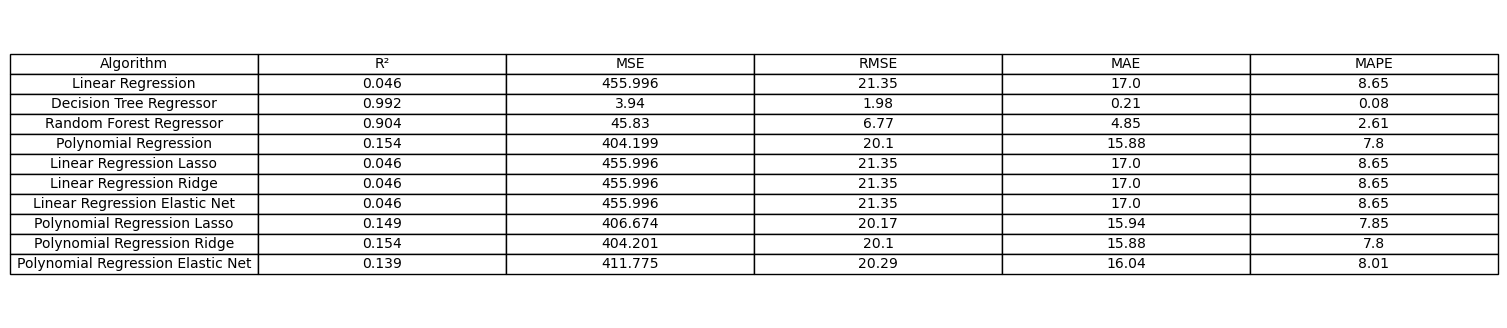

In [46]:
# Training data for each algorithm
train_algorithms = ['Linear Regression', 'Decision Tree Regressor', 'Random Forest Regressor', 'Polynomial Regression', 
                   'Linear Regression Lasso', 'Linear Regression Ridge', 'Linear Regression Elastic Net',
                    'Polynomial Regression Lasso', 'Polynomial Regression Ridge', 'Polynomial Regression Elastic Net']

train_r2 = [train_r2_lr, train_r2_tree, train_r2_rf, train_r2_pr, train_r2_lr_lasso, train_r2_lr_ridge, train_r2_lr_elastic,
            train_r2_pr_lasso, train_r2_pr_ridge, train_r2_pr_elastic]

train_mse = [train_mse_lr, train_mse_tree, train_mse_rf, train_mse_pr, train_mse_lr_lasso, train_mse_lr_ridge, train_mse_lr_elastic,
             train_mse_pr_lasso, train_mse_pr_ridge, train_mse_pr_elastic]

train_rmse = [train_rmse_lr, train_rmse_tree, train_rmse_rf, train_rmse_pr, train_rmse_lr_lasso, train_rmse_lr_ridge, train_rmse_lr_elastic,
              train_rmse_pr_lasso, train_rmse_pr_ridge, train_rmse_pr_elastic]

train_mae = [train_mae_lr, train_mae_tree, train_mae_rf, train_mae_pr, train_mae_lr_lasso, train_mae_lr_ridge, train_mae_lr_elastic,
             train_mae_pr_lasso, train_mae_pr_ridge, train_mae_pr_elastic]

train_mape = [train_mape_lr, train_mape_tree, train_mape_rf, train_mape_pr, train_mape_lr_lasso, train_mape_lr_ridge, train_mape_lr_elastic,
              train_mape_pr_lasso, train_mape_pr_ridge, train_mape_pr_elastic]

# Create a DataFrame with the data
train_data = {
    'Algorithm': train_algorithms,
    'R²': train_r2,
    'MSE': train_mse,
    'RMSE': train_rmse,
    'MAE': train_mae,
    'MAPE': train_mape
}

df_train = pd.DataFrame(train_data)

# Create the table as a figure
fig, ax = plt.subplots(figsize=(16, 4))  # Set the size of the figure
ax.axis('tight')
ax.axis('off')
table = ax.table(cellText=df_train.values, colLabels=df_train.columns, cellLoc='center', loc='center')

# Adjust the font size of the table
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.2)  # Adjust the size of the cells

# Save the image
plt.savefig("regression_algorithm_metrics_train.png", bbox_inches='tight', dpi=300)

# Show the image
plt.show()

### Validation dataset

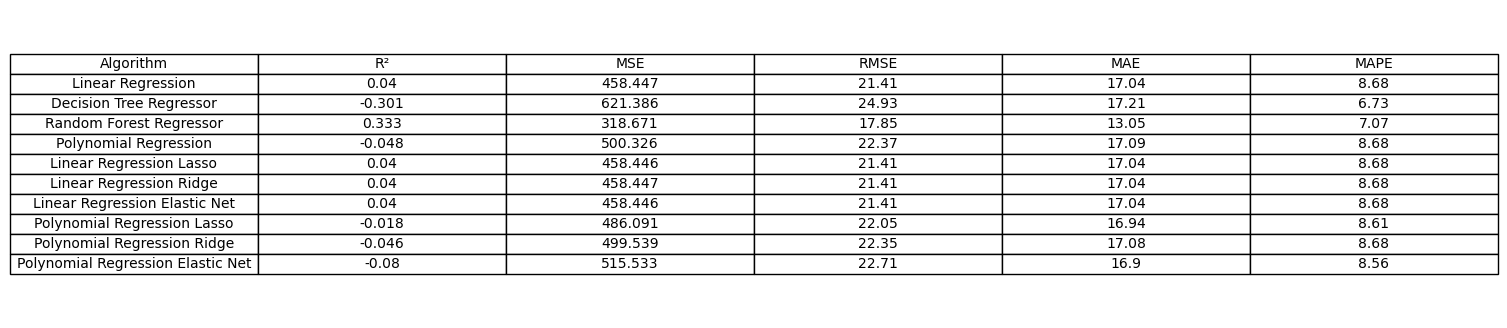

In [47]:
# Validation data for each algorithm
val_algorithms = ['Linear Regression', 'Decision Tree Regressor', 'Random Forest Regressor', 'Polynomial Regression', 
                  'Linear Regression Lasso', 'Linear Regression Ridge', 'Linear Regression Elastic Net',
                  'Polynomial Regression Lasso', 'Polynomial Regression Ridge', 'Polynomial Regression Elastic Net']

val_r2 = [val_r2_lr, val_r2_tree, val_r2_rf, val_r2_pr, val_r2_lr_lasso, val_r2_lr_ridge, val_r2_lr_elastic,
          val_r2_pr_lasso, val_r2_pr_ridge, val_r2_pr_elastic]

val_mse = [val_mse_lr, val_mse_tree, val_mse_rf, val_mse_pr, val_mse_lr_lasso, val_mse_lr_ridge, val_mse_lr_elastic,
           val_mse_pr_lasso, val_mse_pr_ridge, val_mse_pr_elastic]

val_rmse = [val_rmse_lr, val_rmse_tree, val_rmse_rf, val_rmse_pr, val_rmse_lr_lasso, val_rmse_lr_ridge, val_rmse_lr_elastic,
            val_rmse_pr_lasso, val_rmse_pr_ridge, val_rmse_pr_elastic]

val_mae = [val_mae_lr, val_mae_tree, val_mae_rf, val_mae_pr, val_mae_lr_lasso, val_mae_lr_ridge, val_mae_lr_elastic,
           val_mae_pr_lasso, val_mae_pr_ridge, val_mae_pr_elastic]

val_mape = [val_mape_lr, val_mape_tree, val_mape_rf, val_mape_pr, val_mape_lr_lasso, val_mape_lr_ridge, val_mape_lr_elastic,
            val_mape_pr_lasso, val_mape_pr_ridge, val_mape_pr_elastic]

# Create a DataFrame with the data
val_data = {
    'Algorithm': val_algorithms,
    'R²': val_r2,
    'MSE': val_mse,
    'RMSE': val_rmse,
    'MAE': val_mae,
    'MAPE': val_mape
}

df_val = pd.DataFrame(val_data)

# Create the table as a figure
fig, ax = plt.subplots(figsize=(16, 4))  # Set the size of the figure
ax.axis('tight')
ax.axis('off')
table = ax.table(cellText=df_val.values, colLabels=df_val.columns, cellLoc='center', loc='center')

# Adjust the font size of the table
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.2)  # Adjust the size of the cells

# Save the image
plt.savefig("regression_algorithm_metrics_val.png", bbox_inches='tight', dpi=300)

# Show the image
plt.show()

### Test dataset

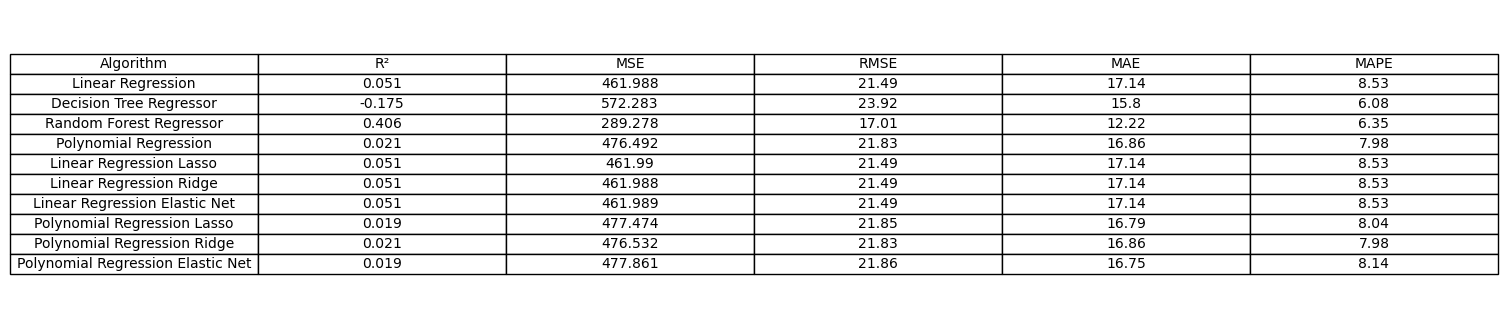

In [48]:
# Test data for each algorithm
test_algorithms = ['Linear Regression', 'Decision Tree Regressor', 'Random Forest Regressor', 'Polynomial Regression', 
                   'Linear Regression Lasso', 'Linear Regression Ridge', 'Linear Regression Elastic Net',
                   'Polynomial Regression Lasso', 'Polynomial Regression Ridge', 'Polynomial Regression Elastic Net']

test_r2 = [test_r2_lr, test_r2_tree, test_r2_rf, test_r2_pr, test_r2_lr_lasso, test_r2_lr_ridge, test_r2_lr_elastic,
            test_r2_pr_lasso, test_r2_pr_ridge, test_r2_pr_elastic]

test_mse = [test_mse_lr, test_mse_tree, test_mse_rf, test_mse_pr, test_mse_lr_lasso, test_mse_lr_ridge, test_mse_lr_elastic,
             test_mse_pr_lasso, test_mse_pr_ridge, test_mse_pr_elastic]

test_rmse = [test_rmse_lr, test_rmse_tree, test_rmse_rf, test_rmse_pr, test_rmse_lr_lasso, test_rmse_lr_ridge, test_rmse_lr_elastic,
              test_rmse_pr_lasso, test_rmse_pr_ridge, test_rmse_pr_elastic]

test_mae = [test_mae_lr, test_mae_tree, test_mae_rf, test_mae_pr, test_mae_lr_lasso, test_mae_lr_ridge, test_mae_lr_elastic,
             test_mae_pr_lasso, test_mae_pr_ridge, test_mae_pr_elastic]

test_mape = [test_mape_lr, test_mape_tree, test_mape_rf, test_mape_pr, test_mape_lr_lasso, test_mape_lr_ridge, test_mape_lr_elastic,
              test_mape_pr_lasso, test_mape_pr_ridge, test_mape_pr_elastic]

# Create a DataFrame with the data
test_data = {
    'Algorithm': test_algorithms,
    'R²': test_r2,
    'MSE': test_mse,
    'RMSE': test_rmse,
    'MAE': test_mae,
    'MAPE': test_mape
}

df_test = pd.DataFrame(test_data)

# Create the table as a figure
fig, ax = plt.subplots(figsize=(16, 4))  # Set the size of the figure
ax.axis('tight')
ax.axis('off')
table = ax.table(cellText=df_test.values, colLabels=df_test.columns, cellLoc='center', loc='center')

# Adjust the font size of the table
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.2)  # Adjust the size of the cells

# Save the image
plt.savefig("regression_algorithm_metrics_test.png", bbox_inches='tight', dpi=300)

# Show the image
plt.show()